In [1]:
import pandas as pd
from Genome.goldstandard_pair.lls import *

In [21]:
gd = '/home/hermuba/data0118/goldstandard/tf_intersect_GO_rm_plasmidGO.smpl'
net = '/home/hermuba/data0118/domain/domain_rm_plasmid_weighted_mutual'


In [ ]:
gold= read_gold(gd)

In [3]:
all_chunks = read_net_by_chunk(net)
all_df = merge_net_with_all_chunks(gold, all_chunks)

/home/hermuba/resistanceExp/Genome/goldstandard_pair/lls.py:26: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  total = pd.concat([d1, d2])


In [4]:
all_df.head()

,gene_one,gene_two,goldstandard,weighted_mutual
0,562.10576.con.0001_191|562.10576,562.22628.con.0090_5|562.22628,0,3.223076e-10
1,562.10576.con.0002_214|562.10576,562.22524.con.0023_76|562.22524,0,2.085070e-08
2,562.10576.con.0002_214|562.10576,562.22588.con.0052_3|562.22588,0,5.696461e-05
3,562.10576.con.0002_214|562.10576,562.22599.con.0020_43|562.22599,0,1.840978e-09
4,562.10576.con.0002_214|562.10576,562.22600.con.0039_26|562.22600,0,2.739266e-09


In [2]:

#import pandas as pd
#all_df = pd.read_csv('~/data0118/goldstandard/GO_smpl/domain_GO_smpl') # this step is f slow

In [5]:
%matplotlib inline
def wrap_for_diff_score(score, all_chunk):
    lls_score = lls_for_domain(all_chunk, score)
    true_thres, slope, intercept = lls_regress_thres(lls_score)
    new_lls = map_lls(lls_score, true_thres, slope, intercept)
    all_chunk = map_score_to_lls(all_chunk, new_lls, score)
    tradeoff = try_diff_lls_thres(all_chunk)
    return(new_lls, all_chunk,lls_score, tradeoff, true_thres)

In [6]:
new_lls, all_chunk,lls_score, tradeoff, true_thres = wrap_for_diff_score('weighted_mutual', all_df)

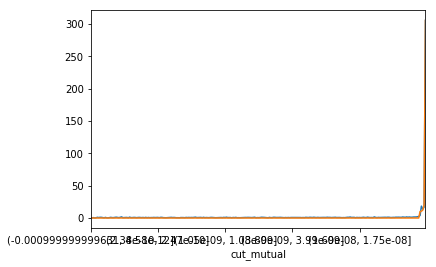

In [7]:
lls_score.plot()
new_lls.plot() 

In [11]:
tradeoff

,thres,coverage,PPV
10.059130,10.059130,0.225806,0.602877
10.542439,10.542439,0.183692,0.631052
12.216864,12.216864,0.135106,0.722500
20.068368,20.068368,0.073477,0.947500
305.530256,305.530256,0.000000,0.000000


In [12]:
tradeoff.to_csv('~/data0118/PPV_coverage/domain_rm_plasmid_250')

Text(0, 0.5, 'PPV')

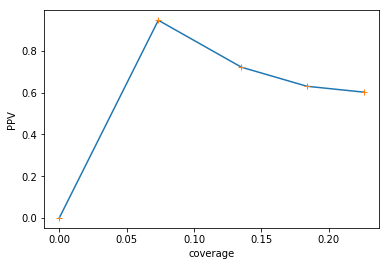

In [13]:
import matplotlib.pyplot as plt
plt.plot(tradeoff['coverage'], tradeoff['PPV'], '-') 
plt.plot(tradeoff['coverage'], tradeoff['PPV'], '+') 
plt.xlabel('coverage')
plt.ylabel('PPV')

In [18]:
all_chunk.to_csv('~/data0118/joined_smpl/domain_smpl_rm_plasmid')

In [22]:
output = '/home/hermuba/data0118/network1122/domain_lls_rm_plasmid_edgelist'

# map LLS_reg back to each "whole" network
map_lls_to_whole_data(net, new_lls, 'weighted_mutual', true_thres, output, 'domain')

/home/hermuba/resistanceExp/Genome/goldstandard_pair/lls.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  all_df['lls'] = all_df[score].map(new_lls)
/home/hermuba/miniconda3/lib/python3.6/site-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


(1156, 4)
590.9921435238672
(1156, 4)
(1065, 4)
590.9921435238672
(1065, 4)
(1093, 4)
590.9921435238672
(1093, 4)
(1118, 4)
590.9921435238672
(1118, 4)
(1076, 4)
590.9921435238672
(1076, 4)
(1046, 4)
590.9921435238672
(1046, 4)
(1179, 4)
590.9921435238672
(1179, 4)
(1192, 4)
590.9921435238672
(1192, 4)
(1447, 4)
590.9921435238672
(1447, 4)
(1131, 4)
590.9921435238672
(1131, 4)
(1128, 4)
590.9921435238672
(1128, 4)
(1117, 4)
590.9921435238672
(1117, 4)
(1125, 4)
590.9921435238672
(1125, 4)
(1085, 4)
590.9921435238672
(1085, 4)
(1211, 4)
590.9921435238672
(1211, 4)
(1104, 4)
590.9921435238672
(1104, 4)
(771, 4)
590.9921435238672
(771, 4)
(777, 4)
590.9921435238672
(777, 4)
(956, 4)
590.9921435238672
(956, 4)
(920, 4)
590.9921435238672
(920, 4)
(899, 4)
590.9921435238672
(899, 4)
(971, 4)
590.9921435238672
(971, 4)
(895, 4)
590.9921435238672
(895, 4)
(970, 4)
590.9921435238672
(970, 4)
(912, 4)
590.9921435238672
(912, 4)
(1133, 4)
590.9921435238672
(1133, 4)
(772, 4)
590.9921435238672
(77

(393, 4)
590.9921435238672
(393, 4)
(506, 4)
590.9921435238672
(506, 4)
(829, 4)
590.9921435238672
(829, 4)
(824, 4)
590.9921435238672
(824, 4)
(826, 4)
590.9921435238672
(826, 4)
(837, 4)
590.9921435238672
(837, 4)
(835, 4)
590.9921435238672
(835, 4)
(903, 4)
590.9921435238672
(903, 4)
(856, 4)
590.9921435238672
(856, 4)
(959, 4)
590.9921435238672
(959, 4)
(900, 4)
590.9921435238672
(900, 4)
(891, 4)
590.9921435238672
(891, 4)
(939, 4)
590.9921435238672
(939, 4)
(986, 4)
590.9921435238672
(986, 4)
(908, 4)
590.9921435238672
(908, 4)
(911, 4)
590.9921435238672
(911, 4)
(782, 4)
590.9921435238672
(782, 4)
(738, 4)
590.9921435238672
(738, 4)
(775, 4)
590.9921435238672
(775, 4)
(1392, 4)
590.9921435238672
(1392, 4)
(1568, 4)
590.9921435238672
(1568, 4)
(1430, 4)
590.9921435238672
(1430, 4)
(1567, 4)
590.9921435238672
(1567, 4)
(1488, 4)
590.9921435238672
(1488, 4)
(1265, 4)
590.9921435238672
(1265, 4)
(985, 4)
590.9921435238672
(985, 4)
(1068, 4)
590.9921435238672
(1068, 4)
(1240, 4)
590.

(1012, 4)
590.9921435238672
(1012, 4)
(879, 4)
590.9921435238672
(879, 4)
(938, 4)
590.9921435238672
(938, 4)
(863, 4)
590.9921435238672
(863, 4)
(882, 4)
590.9921435238672
(882, 4)
(788, 4)
590.9921435238672
(788, 4)
(909, 4)
590.9921435238672
(909, 4)
(927, 4)
590.9921435238672
(927, 4)
(755, 4)
590.9921435238672
(755, 4)
(658, 4)
590.9921435238672
(658, 4)
(704, 4)
590.9921435238672
(704, 4)
(725, 4)
590.9921435238672
(725, 4)
(736, 4)
590.9921435238672
(736, 4)
(743, 4)
590.9921435238672
(743, 4)
(704, 4)
590.9921435238672
(704, 4)
(659, 4)
590.9921435238672
(659, 4)
(501, 4)
590.9921435238672
(501, 4)
(459, 4)
590.9921435238672
(459, 4)
(652, 4)
590.9921435238672
(652, 4)
(928, 4)
590.9921435238672
(928, 4)
(947, 4)
590.9921435238672
(947, 4)
(985, 4)
590.9921435238672
(985, 4)
(968, 4)
590.9921435238672
(968, 4)
(859, 4)
590.9921435238672
(859, 4)
(673, 4)
590.9921435238672
(673, 4)
(609, 4)
590.9921435238672
(609, 4)
(827, 4)
590.9921435238672
(827, 4)
(906, 4)
590.9921435238672

(261, 4)
590.9921435238672
(261, 4)
(927, 4)
590.9921435238672
(927, 4)
(1105, 4)
590.9921435238672
(1105, 4)
(1179, 4)
590.9921435238672
(1179, 4)
(1074, 4)
590.9921435238672
(1074, 4)
(947, 4)
590.9921435238672
(947, 4)
(924, 4)
590.9921435238672
(924, 4)
(955, 4)
590.9921435238672
(955, 4)
(1014, 4)
590.9921435238672
(1014, 4)
(1045, 4)
590.9921435238672
(1045, 4)
(1025, 4)
590.9921435238672
(1025, 4)
(989, 4)
590.9921435238672
(989, 4)
(969, 4)
590.9921435238672
(969, 4)
(838, 4)
590.9921435238672
(838, 4)
(790, 4)
590.9921435238672
(790, 4)
(884, 4)
590.9921435238672
(884, 4)
(956, 4)
590.9921435238672
(956, 4)
(919, 4)
590.9921435238672
(919, 4)
(915, 4)
590.9921435238672
(915, 4)
(908, 4)
590.9921435238672
(908, 4)
(736, 4)
590.9921435238672
(736, 4)
(654, 4)
590.9921435238672
(654, 4)
(653, 4)
590.9921435238672
(653, 4)
(1047, 4)
590.9921435238672
(1047, 4)
(1060, 4)
590.9921435238672
(1060, 4)
(1020, 4)
590.9921435238672
(1020, 4)
(1184, 4)
590.9921435238672
(1184, 4)
(1125, 4

(1371, 4)
590.9921435238672
(1371, 4)
(1243, 4)
590.9921435238672
(1243, 4)
(1214, 4)
590.9921435238672
(1214, 4)
(1339, 4)
590.9921435238672
(1339, 4)
(1429, 4)
590.9921435238672
(1429, 4)
(1060, 4)
590.9921435238672
(1060, 4)
(1037, 4)
590.9921435238672
(1037, 4)
(1044, 4)
590.9921435238672
(1044, 4)
(935, 4)
590.9921435238672
(935, 4)
(900, 4)
590.9921435238672
(900, 4)
(797, 4)
590.9921435238672
(797, 4)
(1126, 4)
590.9921435238672
(1126, 4)
(1207, 4)
590.9921435238672
(1207, 4)
(1214, 4)
590.9921435238672
(1214, 4)
(1099, 4)
590.9921435238672
(1099, 4)
(1145, 4)
590.9921435238672
(1145, 4)
(992, 4)
590.9921435238672
(992, 4)
(1039, 4)
590.9921435238672
(1039, 4)
(780, 4)
590.9921435238672
(780, 4)
(779, 4)
590.9921435238672
(779, 4)
(660, 4)
590.9921435238672
(660, 4)
(752, 4)
590.9921435238672
(752, 4)
(818, 4)
590.9921435238672
(818, 4)
(778, 4)
590.9921435238672
(778, 4)
(1107, 4)
590.9921435238672
(1107, 4)
(1122, 4)
590.9921435238672
(1122, 4)
(1001, 4)
590.9921435238672
(100

(1165, 4)
590.9921435238672
(1165, 4)
(1223, 4)
590.9921435238672
(1223, 4)
(1165, 4)
590.9921435238672
(1165, 4)
(972, 4)
590.9921435238672
(972, 4)
(1121, 4)
590.9921435238672
(1121, 4)
(1086, 4)
590.9921435238672
(1086, 4)
(1036, 4)
590.9921435238672
(1036, 4)
(1342, 4)
590.9921435238672
(1342, 4)
(1449, 4)
590.9921435238672
(1449, 4)
(1519, 4)
590.9921435238672
(1519, 4)
(1244, 4)
590.9921435238672
(1244, 4)
(1128, 4)
590.9921435238672
(1128, 4)
(947, 4)
590.9921435238672
(947, 4)
(987, 4)
590.9921435238672
(987, 4)
(879, 4)
590.9921435238672
(879, 4)
(1416, 4)
590.9921435238672
(1416, 4)
(1545, 4)
590.9921435238672
(1545, 4)
(1327, 4)
590.9921435238672
(1327, 4)
(1226, 4)
590.9921435238672
(1226, 4)
(1224, 4)
590.9921435238672
(1224, 4)
(1234, 4)
590.9921435238672
(1234, 4)
(892, 4)
590.9921435238672
(892, 4)
(816, 4)
590.9921435238672
(816, 4)
(792, 4)
590.9921435238672
(792, 4)
(832, 4)
590.9921435238672
(832, 4)
(900, 4)
590.9921435238672
(900, 4)
(937, 4)
590.9921435238672
(93

590.9921435238672
(1080, 4)
(1080, 4)
590.9921435238672
(1080, 4)
(974, 4)
590.9921435238672
(974, 4)
(943, 4)
590.9921435238672
(943, 4)
(880, 4)
590.9921435238672
(880, 4)
(903, 4)
590.9921435238672
(903, 4)
(699, 4)
590.9921435238672
(699, 4)
(1125, 4)
590.9921435238672
(1125, 4)
(918, 4)
590.9921435238672
(918, 4)
(1053, 4)
590.9921435238672
(1053, 4)
(1057, 4)
590.9921435238672
(1057, 4)
(1067, 4)
590.9921435238672
(1067, 4)
(1023, 4)
590.9921435238672
(1023, 4)
(866, 4)
590.9921435238672
(866, 4)
(1150, 4)
590.9921435238672
(1150, 4)
(1061, 4)
590.9921435238672
(1061, 4)
(890, 4)
590.9921435238672
(890, 4)
(745, 4)
590.9921435238672
(745, 4)
(871, 4)
590.9921435238672
(871, 4)
(966, 4)
590.9921435238672
(966, 4)
(826, 4)
590.9921435238672
(826, 4)
(779, 4)
590.9921435238672
(779, 4)
(807, 4)
590.9921435238672
(807, 4)
(1001, 4)
590.9921435238672
(1001, 4)
(891, 4)
590.9921435238672
(891, 4)
(918, 4)
590.9921435238672
(918, 4)
(668, 4)
590.9921435238672
(668, 4)
(1068, 4)
590.9921

(1390, 4)
590.9921435238672
(1390, 4)
(1207, 4)
590.9921435238672
(1207, 4)
(1233, 4)
590.9921435238672
(1233, 4)
(1033, 4)
590.9921435238672
(1033, 4)
(1420, 4)
590.9921435238672
(1420, 4)
(1506, 4)
590.9921435238672
(1506, 4)
(1166, 4)
590.9921435238672
(1166, 4)
(1340, 4)
590.9921435238672
(1340, 4)
(1653, 4)
590.9921435238672
(1653, 4)
(1664, 4)
590.9921435238672
(1664, 4)
(2010, 4)
590.9921435238672
(2010, 4)
(1981, 4)
590.9921435238672
(1981, 4)
(1736, 4)
590.9921435238672
(1736, 4)
(1935, 4)
590.9921435238672
(1935, 4)
(1453, 4)
590.9921435238672
(1453, 4)
(2351, 4)
590.9921435238672
(2351, 4)
(1979, 4)
590.9921435238672
(1979, 4)
(1439, 4)
590.9921435238672
(1439, 4)
(1436, 4)
590.9921435238672
(1436, 4)
(1491, 4)
590.9921435238672
(1491, 4)
(1358, 4)
590.9921435238672
(1358, 4)
(1273, 4)
590.9921435238672
(1273, 4)
(1712, 4)
590.9921435238672
(1712, 4)
(1264, 4)
590.9921435238672
(1264, 4)
(1412, 4)
590.9921435238672
(1412, 4)
(1232, 4)
590.9921435238672
(1232, 4)
(1097, 4)
59